In [11]:
import os
import sys
import csv
import logging
import matplotlib.pyplot as plt
import pandas as pd

repo_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..',))
sys.path.append(repo_root)

from src import *

In [12]:
# Process saved files
process_directory(1, os.getcwd(), 'ex01.1' , '01.1')
process_directory(3, os.getcwd(), 'ex01.2' , '01.2')
process_directory(4, os.getcwd(), 'ex01.3' , '01.3')

In [13]:


def plot_proportions(proportion_df, mean_df):

    fig, axes = plt.subplots(1, 2, figsize=(20, 8))
    
    # Assuming 'train' is the column for train size in both DataFrames
    train_size = proportion_df['train'].unique()
    
    # Plot proportions
    ax = axes[0]
    for column in proportion_df.columns:
        if column != 'train' and column != 'rep' and column != 'Game':
            ax.plot(train_size, proportion_df[column], label=column, marker='o')
    ax.hlines(y=.5, xmin=0, xmax=1, linestyles='--', color='grey', alpha=0.5)
    ax.set_xscale('log')
    ax.set_xlabel('Train Size')
    ax.set_ylabel('Proportion')
    ax.set_title('Model Proportions vs Train Size')
    ax.legend()
    
    # Plot means
    ax = axes[1]
    for column in mean_df.columns:
        if column != 'train' and column != 'rep' and column != 'Game':
            ax.plot(train_size, mean_df[column], label=column, marker='s')
            
    ax.set_xscale('log')
    ax.set_xlabel('Train Size')
    ax.set_ylabel('Mean')
    ax.set_title('Model Means vs Train Size')
    ax.legend()
    
    plt.tight_layout()
    plt.show()


# Standard 

In [14]:
prop_df = pd.read_csv(os.path.join(os.getcwd(), 'results', '01.1_proportions.csv'))
mean_df = pd.read_csv(os.path.join(os.getcwd(), 'results', '01.1_means.csv'))
prop_result = prop_df.groupby(['train']).mean().reset_index()[['spring_rank', 'page_rank', 'point_wise', 'train']]
mean_result = mean_df.groupby(['train']).mean().reset_index()[['spring_rank', 'page_rank', 'point_wise', 'train']]



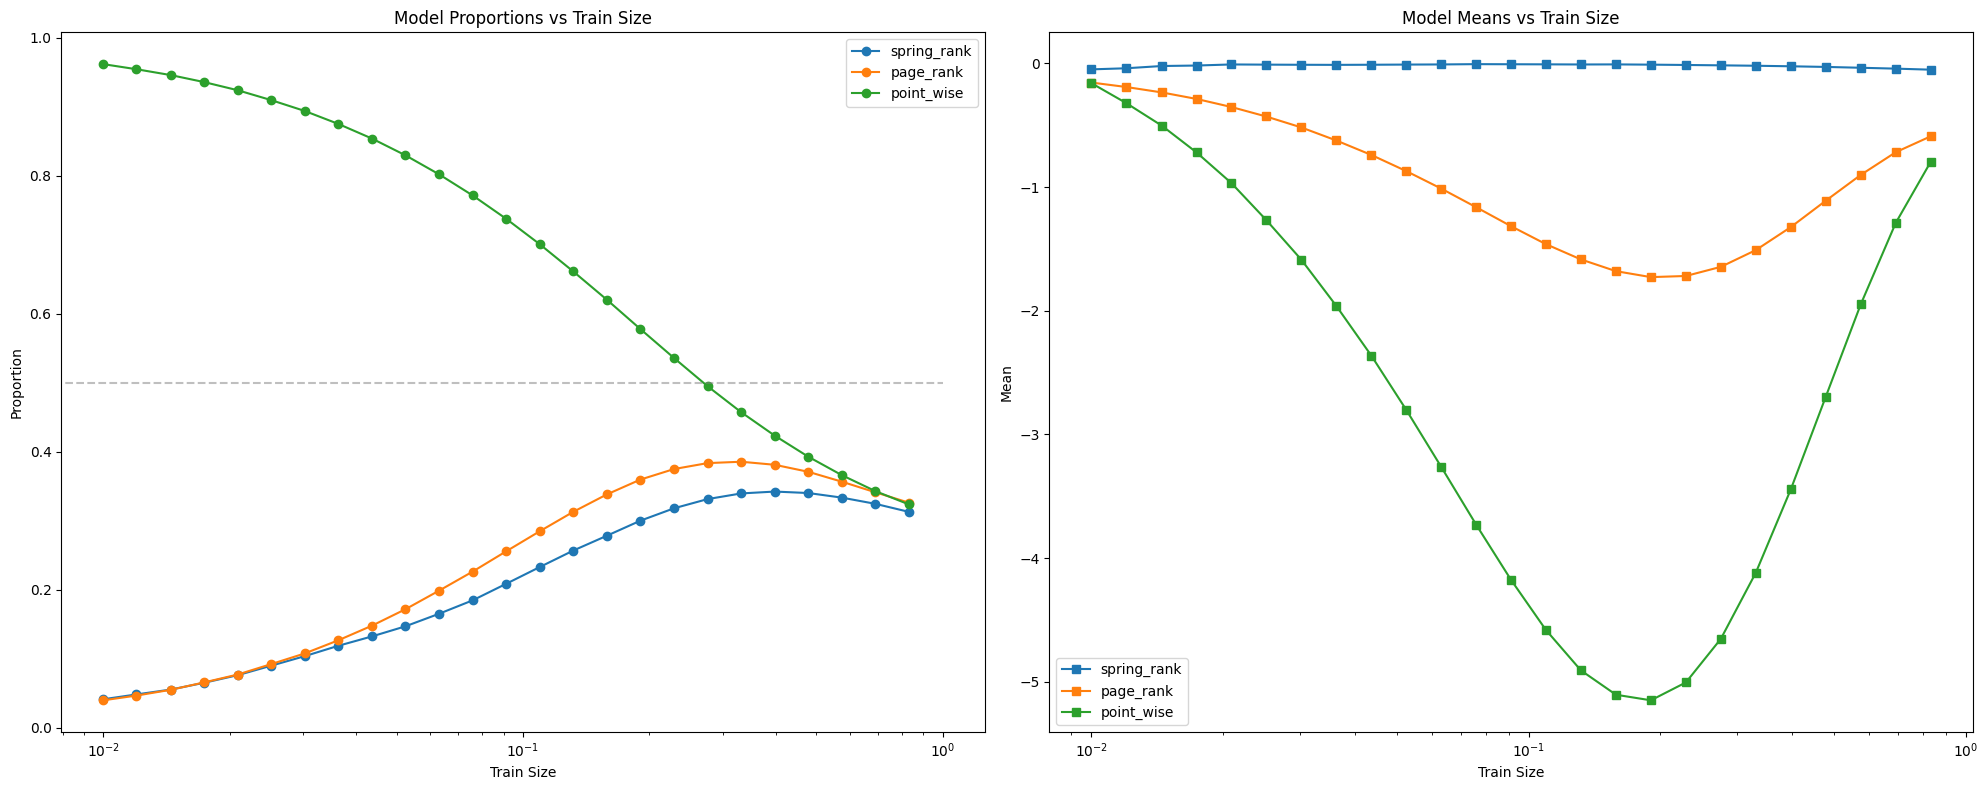

In [15]:
plot_proportions(prop_result, mean_result)

# Higher Order 

In [18]:
prop_df = pd.read_csv(os.path.join(os.getcwd(), 'results', '01.2_proportions.csv'))
mean_df = pd.read_csv(os.path.join(os.getcwd(), 'results', '01.2_means.csv'))
prop_result = prop_df.groupby(['train']).mean().reset_index()
mean_result = mean_df.groupby(['train']).mean().reset_index()



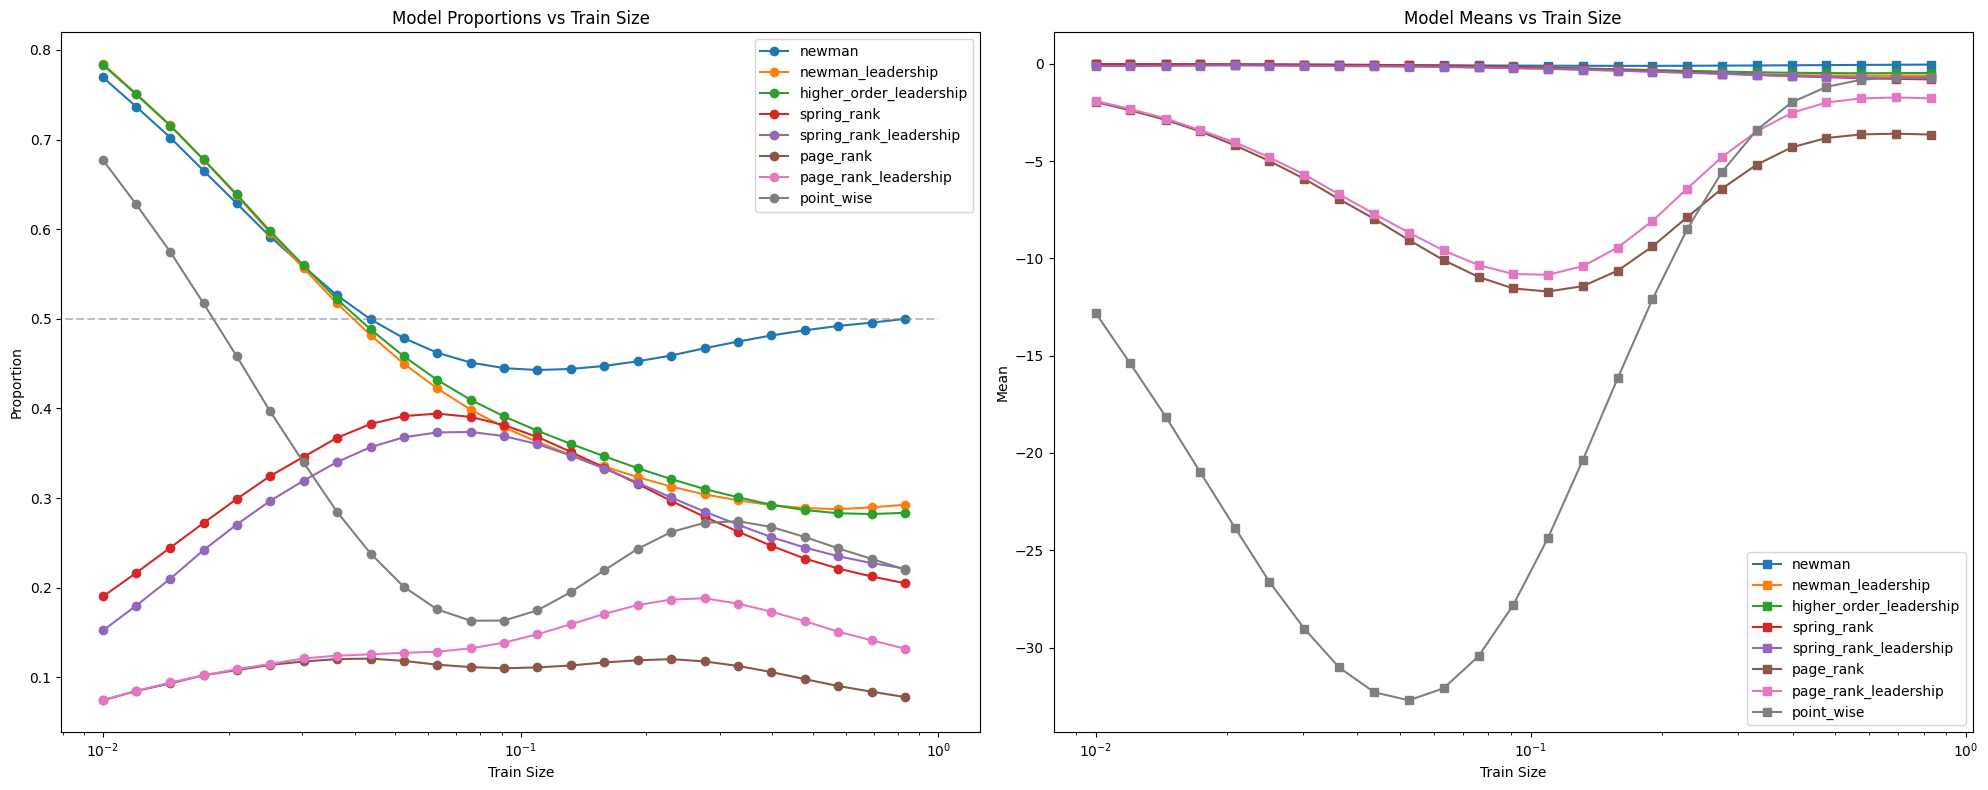

In [19]:
plot_proportions(prop_result, mean_result)

# Higher Order Leadership

In [20]:
prop_df = pd.read_csv(os.path.join(os.getcwd(), 'results', '01.3_proportions.csv'))
mean_df = pd.read_csv(os.path.join(os.getcwd(), 'results', '01.3_means.csv'))
prop_result = prop_df.groupby(['train']).mean().reset_index()
mean_result = mean_df.groupby(['train']).mean().reset_index()


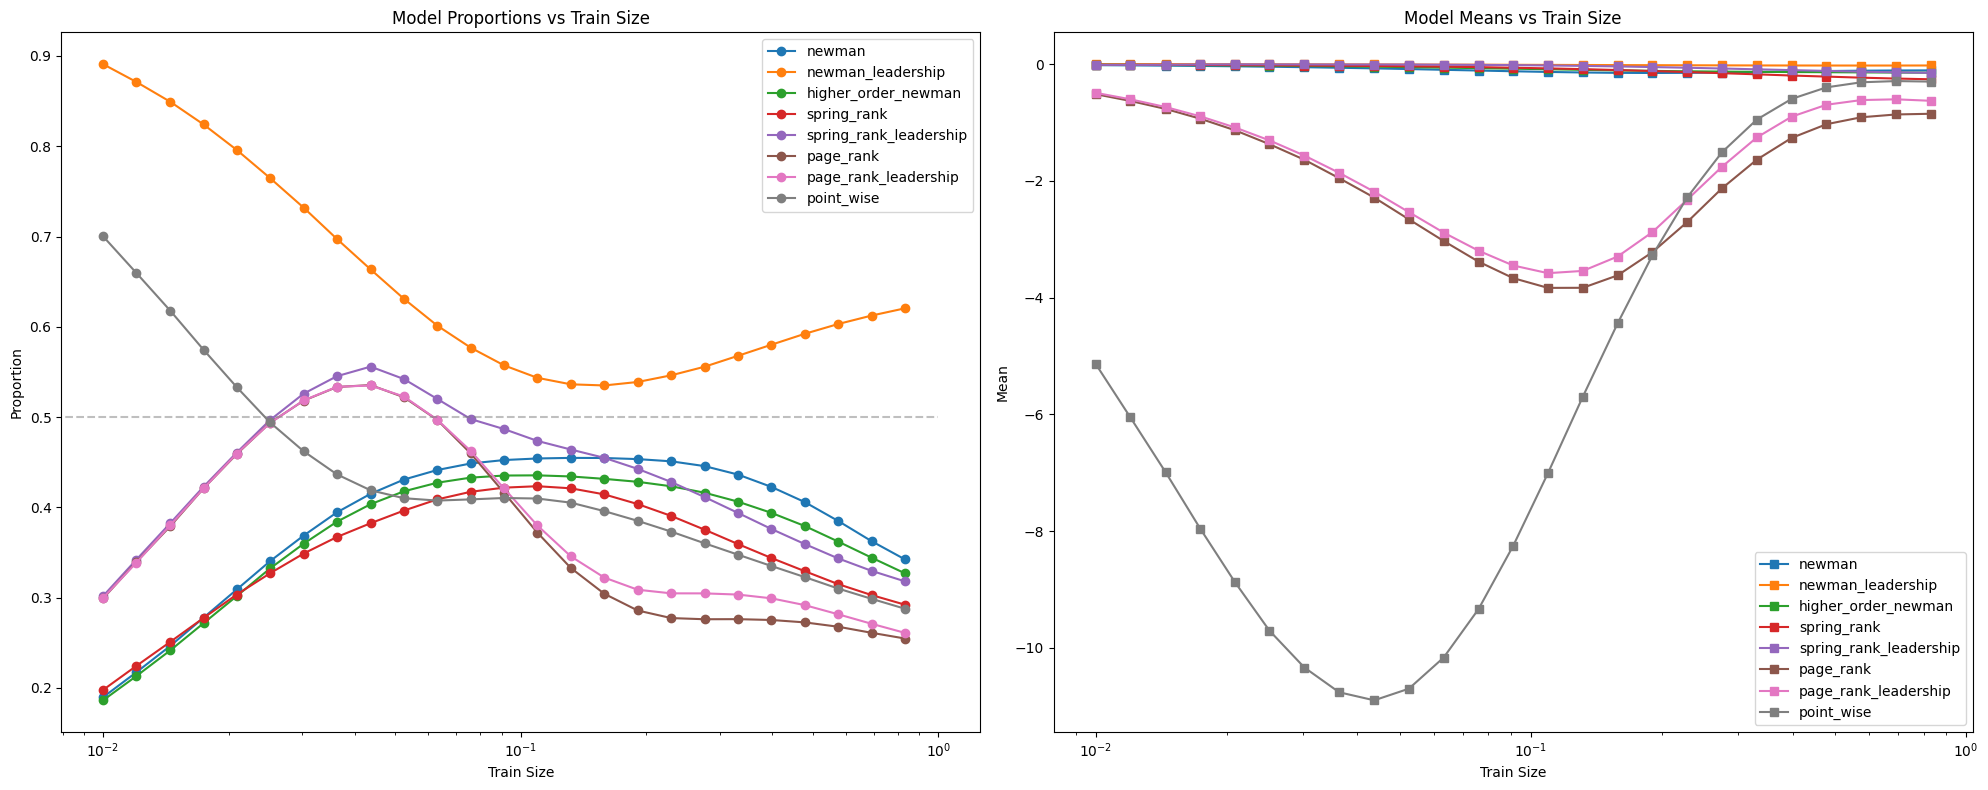

In [21]:
plot_proportions(prop_result, mean_result)